# Goal for this Notebook:
Show a simple example of an analysis of the Titanic disaster in Python. This is aimed for those looking to get into the field or those who are already in the field and looking to see an example of an analysis done with Python.

**This Notebook will show basic examples of:**
**Data Handling**
* Importing Data with Pandas
* Cleaning Data
* Exploring Data through Visualizations with Matplotlib and Seaborn
**Data Analysis**
* Supervised Machine learning Techniques:
* K Nearest Neighbour
* Gaussian Naive Bayes
* Support Vector Machine (SVM)
* Decision Tree Classifier
* Plotting results.

## Importing the required Libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import scipy as sc
import sys
import IPython
from IPython import display 
import sklearn 
import random
import time

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [4]:
#Configure Visualization Defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [5]:
# Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

### Describing and analysing the given data sets for better understanding of the data provided

In [7]:
data_raw = pd.read_csv("../input/titanic/train.csv")
data_test = pd.read_csv("../input/titanic/test.csv")

data_train = data_raw.copy(deep = True)
# combining the two datasets for cleaning
data_to_be_cleaned = [data_train, data_test]

In [8]:
data_raw.info()
print('*-'*25)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [9]:
print('Train columns with null values:\n', data_train.isnull().sum())
print("*-"*25)

print('Test/Validation columns with null values:\n', data_test.isnull().sum())
print("*-"*25)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [10]:
data_raw.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Harknett, Miss. Alice Phoebe",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Cleaning the dataset

In [11]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_to_be_cleaned:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [12]:
data_to_be_cleaned

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [13]:
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data_train.drop(drop_column, axis=1, inplace = True)

print(data_train.isnull().sum())
print("-"*50)
print(data_test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [14]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_to_be_cleaned:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [15]:
data_to_be_cleaned[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB


In [16]:
data_to_be_cleaned[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  FamilySize   418 non-null    int64   
 12  IsAlone      418 non-null    int64   
 13  Title        418 non-null    object  
 14  FareBin      418 non-null    category
 15  AgeBin       418 non-null    category
dtypes: category(2), float64(2), int64(6), object(6)
memory usage: 47.1+ KB


In [17]:
#cleanup rare title names
print(data_train['Title'].value_counts())
print('*-*'*10)
stat_min = 10 
title_names = (data_train['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code
data_train['Title'] = data_train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data_train['Title'].value_counts())
print("-"*50)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Mme               1
the Countess      1
Don               1
Ms                1
Jonkheer          1
Lady              1
Sir               1
Capt              1
Name: Title, dtype: int64
*-**-**-**-**-**-**-**-**-**-*
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
--------------------------------------------------


In [18]:
#preview data again
data_train.info()
data_test.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,1,Mr,"(31.0, 512.329]","(48.0, 64.0]"
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,5,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3,0,Mrs,"(7.91, 14.454]","(16.0, 32.0]"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,0,Mrs,"(14.454, 31.0]","(-0.08, 16.0]"


In [19]:
data_test.shape

(418, 16)

In [20]:
data_train.shape

(891, 14)

In [21]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_to_be_cleaned:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


In [22]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,1,5,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]",0,2,6,3,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]",1,1,5,4,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]",0,2,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,...,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,1,Dona,"(31.472, 512.329]","(30.4, 45.6]",0,0,1,2,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,2,5,2,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,...,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1


In [23]:
#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
original_train_data = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
train_data = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','IsAlone', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] #coded for algorithm calculation
original_dataset =  Target + original_train_data
print('Original X Y: ', original_dataset, '\n')
print('Training X Y: ', train_data, '\n')

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Training X Y:  ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'IsAlone', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



#### Double check Cleaned Data

In [24]:
print('Train columns with null values: \n', data_train.isnull().sum())
print("-"*10)
print (data_train.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_test.isnull().sum())
print("-"*10)
print (data_test.info())
print("-"*10)

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 no

In [25]:
X = data_train[train_data]

In [26]:
Y = data_train[Target]

## Split Training and Testing Data

In [27]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_train[train_data], data_train[Target],test_size= 0.2, random_state = 0)

print("Data given for training - Shape: {}".format(data_train.shape))
print("Train split of the given training data - Shape: {}".format(x_train.shape))
print("Test split of the tgiven training data - Shape: {}".format(x_test.shape))

original_refined_dataset = data_train[original_train_data]

x_train.head()


Data given for training - Shape: (891, 19)
Train split of the given training data - Shape: (712, 8)
Test split of the tgiven training data - Shape: (179, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,IsAlone,FamilySize,AgeBin_Code,FareBin_Code
140,0,3,0,4,0,3,1,2
439,1,2,2,3,1,1,1,1
817,1,2,0,3,0,3,1,3
378,1,3,0,3,1,1,1,0
491,1,3,2,3,1,1,1,0


In [28]:
original_refined_dataset

,Sex,Pclass,Embarked,Title,SibSp,Parch,Age,Fare,FamilySize,IsAlone
0,male,3,S,Mr,1,0,22.0,7.2500,2,0
1,female,1,C,Mrs,1,0,38.0,71.2833,2,0
2,female,3,S,Miss,0,0,26.0,7.9250,1,1
3,female,1,S,Mrs,1,0,35.0,53.1000,2,0
4,male,3,S,Mr,0,0,35.0,8.0500,1,1
...,...,...,...,...,...,...,...,...,...,...
886,male,2,S,Misc,0,0,27.0,13.0000,1,1
887,female,1,S,Miss,0,0,19.0,30.0000,1,1
888,female,3,S,Miss,1,2,28.0,23.4500,4,0
889,male,1,C,Mr,0,0,26.0,30.0000,1,1


## Perform Exploratory Analysis with Statistics

In [29]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table
for x in original_refined_dataset:
    if data_train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data_train[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

#using crosstabs
print(pd.crosstab(data_train['Title'],data_train[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

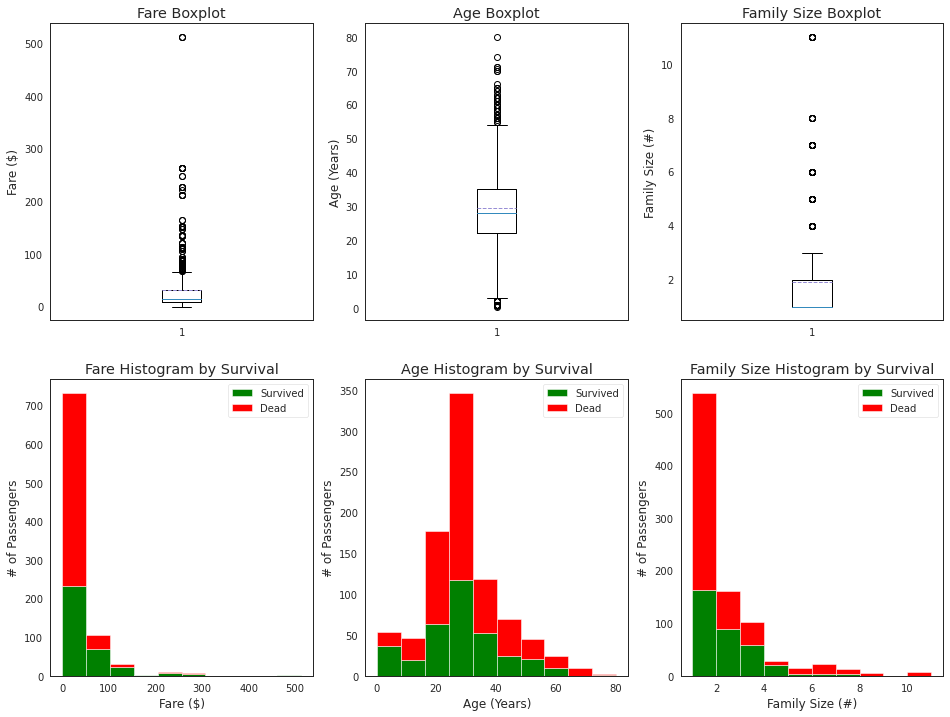

In [30]:

plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data_train['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data_train['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data_train['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data_train[data_train['Survived']==1]['Fare'], data_train[data_train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data_train[data_train['Survived']==1]['Age'], data_train[data_train['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data_train[data_train['Survived']==1]['FamilySize'], data_train[data_train['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

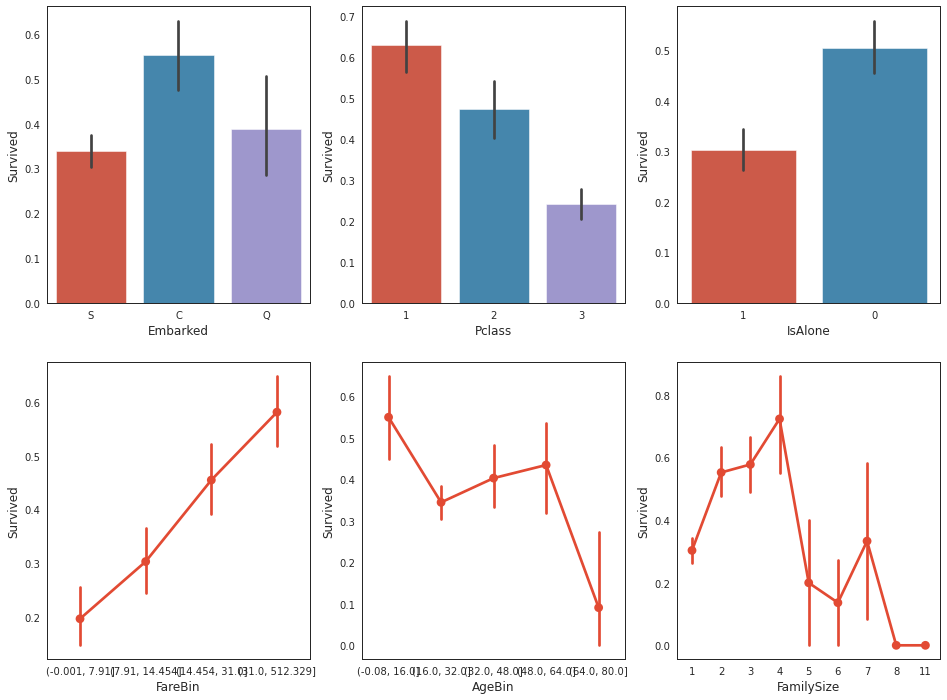

In [31]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data_train, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data_train, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data_train, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data_train, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data_train, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data_train, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

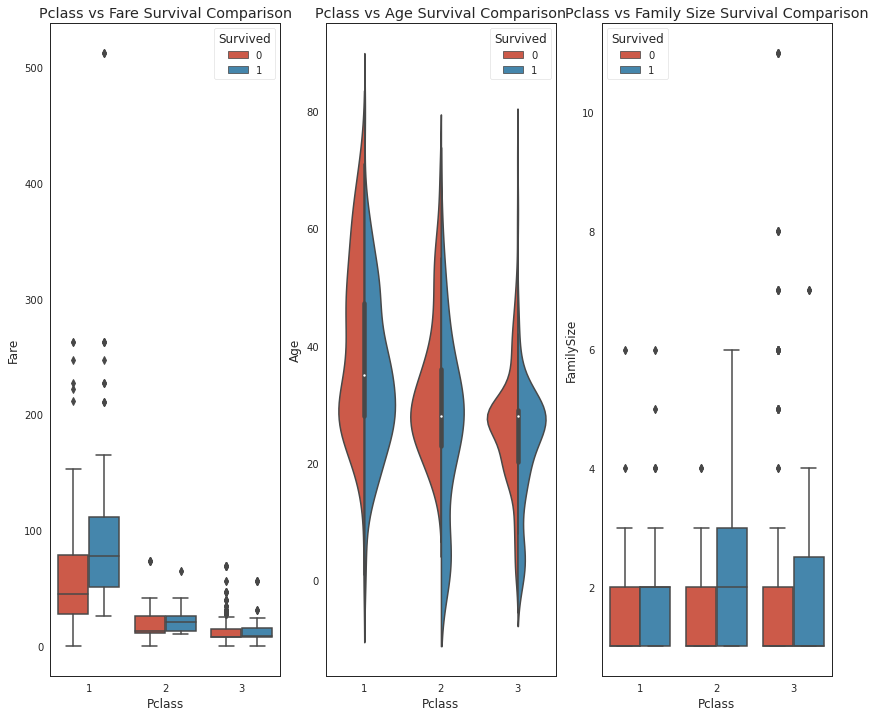

In [32]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data_train, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data_train, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data_train, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

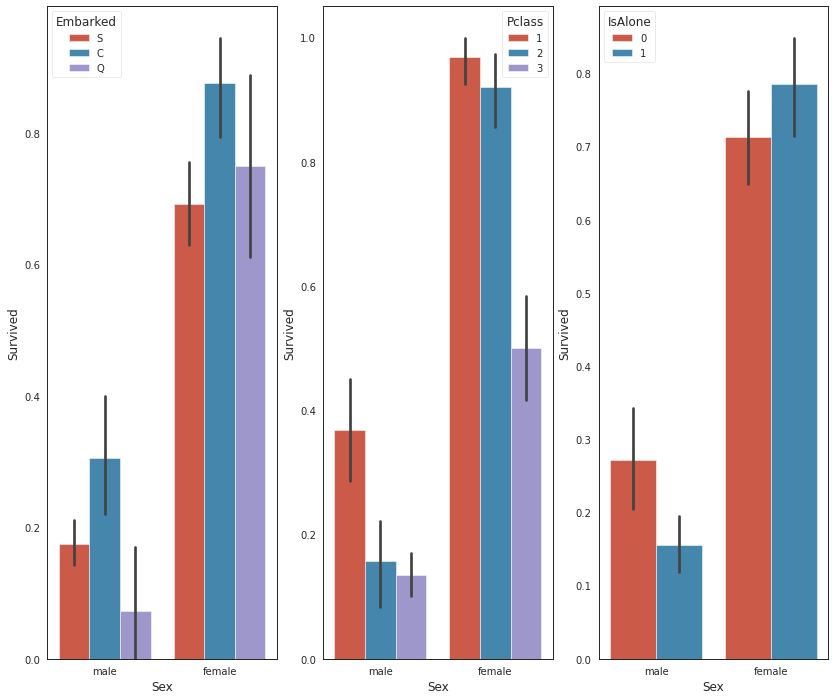

In [33]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data_train, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data_train, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data_train, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

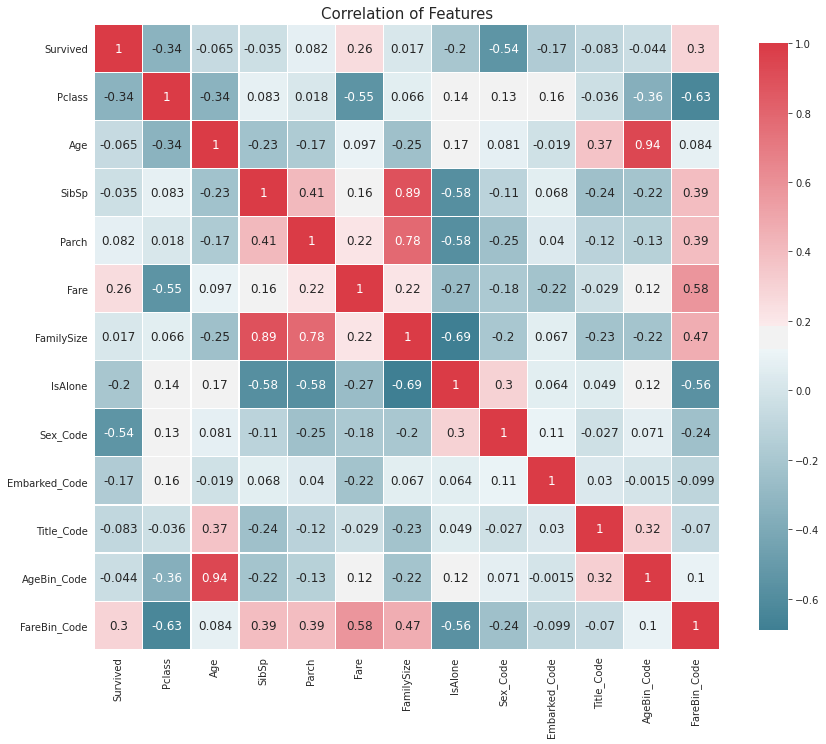

In [34]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation of Features', y=1.05, size=15)

correlation_heatmap(data_train)

## Model Data

In [35]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
# Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#### KNN Model

In [36]:
knn = KNeighborsClassifier(metric='minkowski', p=2) 
## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

Accuracy scores are: [0.7320224719101124, 0.7634831460674156, 0.7786516853932584, 0.7898876404494383, 0.7932584269662922, 0.7853932584269663, 0.798876404494382, 0.7915730337078652, 0.8016853932584269, 0.7960674157303371, 0.798314606741573, 0.7938202247191011, 0.792696629213483, 0.7898876404494383, 0.7921348314606742, 0.7876404494382022, 0.7910112359550562, 0.7893258426966293, 0.7926966292134832, 0.7904494382022472, 0.7887640449438201, 0.7893258426966292, 0.7853932584269663, 0.7859550561797752, 0.7865168539325843, 0.7803370786516853, 0.7882022471910112, 0.7831460674157302, 0.7842696629213484, 0.7780898876404494]

Mean accuracy score: 0.7866292134831462


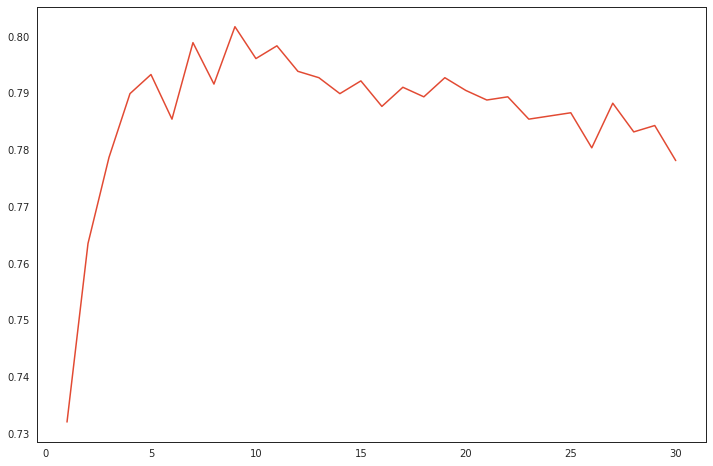

In [37]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train , y_train , cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))
plt.plot(k_range, k_scores)

In [38]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[94 16]
 [18 51]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [40]:
knn_accy = accuracy_score(y_pred, y_test)
print(knn_accy)

0.8100558659217877


#### Gaussian Naive Bayes Model

In [41]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X,Y)

y_pred = gaussian.predict(x_test)
gaussian_accy = accuracy_score(y_pred, y_test)

print(gaussian_accy)

0.7988826815642458


In [42]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85 25]
 [11 58]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       110
           1       0.70      0.84      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.81      0.79       179
weighted avg       0.81      0.80      0.80       179



#### SVM Classifier Model

In [43]:
svclassifier = SVC(kernel='rbf')

svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

svclassifier_accy = accuracy_score(y_pred, y_test)
print(svclassifier_accy)

0.8268156424581006


In [44]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96 14]
 [17 52]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



#### Decision Tree Model

In [45]:
decision_tree_classifier =DecisionTreeClassifier()

decision_tree_classifier.fit(x_train, y_train)
y_pred = decision_tree_classifier.predict(x_test)

decision_tree_classifier_accy = accuracy_score(y_pred, y_test)
print(decision_tree_classifier_accy)

0.8324022346368715


In [46]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101   9]
 [ 21  48]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



**The maximum accuracy that was obtained is 83.8% of Decision Tree model. This model will be used to predict the values of the validation test data.**

In [47]:
validation_data = data_test

In [48]:
validation_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,1,5,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]",0,2,6,3,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]",1,1,5,4,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]",0,2,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,...,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,1,Dona,"(31.472, 512.329]","(30.4, 45.6]",0,0,1,2,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,2,5,2,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,...,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1


In [49]:
X_val = validation_data[train_data]
val_prediction = decision_tree_classifier.predict(X_val)
passengerid = validation_data["PassengerId"]

In [50]:
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": val_prediction
    })

In [51]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("gender_submission.csv", index=False)